### An example data exploration to look at some aspects of plotting

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

Import the data on Darwin's finches from github



Cadena CD, Zapata F, Jiménez I. 2017. Issues and perspectives in species   
delimitation using phenotypic data: Atlantean evolution in Darwin’s finches.    
Systematic Biology (https://academic.oup.com/sysbio/article/doi/10.1093/sysbio/syx071/4102004/Issues-and-Perspectives-in-Species-Delimitation)

Plot the data to show how the new taxonomy differs from the old taxonomy.

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
%matplotlib inline

In [ ]:
Use ! wget to download the data from github (https://github.com/zapataf/geospiza_morphology_2017/raw/master/CAS_Swarth_Geospiza.csv)

Check the file structure using

    ! head -3 my_file
    
This unix command shows the first 3 lines of a file adn will help you decide on the right command to use to read it into pandas.

In [ ]:
Use df.head(3) and df.info() to find out about the dataframe.

Check the types of each column of data - change any which need it using:
    
    df['Column_name'] = df['Column_name'].astype('int') 
    


Do we have measures from both sexes?  We can use unique to see the different values in column'Sex'.

Check the values in each column using:
    
    df['Column_name'].unique()
    
You can get a count of the number of uniques values in each column using:

    df['Column_name'].unique().size

A very useful first examination of data is pairplot.  Pairplot plots all the numeric values against each other along with a histrogram of the distribution of each numeric value.  

    sns.pairplot(data=df)
    
Like other seaborn commands you can use hue="Column_name" to show more detail

<AxesSubplot:xlabel='Wing', ylabel='Count'>

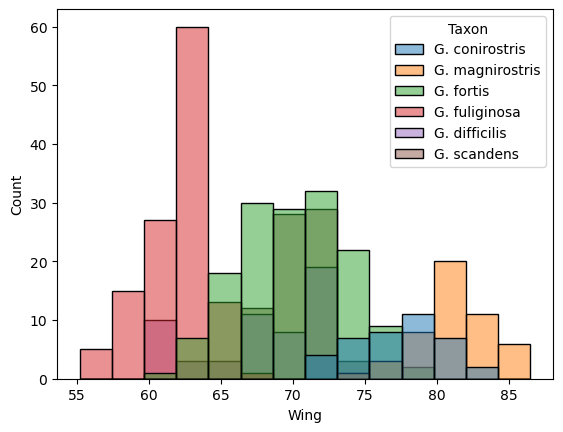

In [239]:
sns.histplot(data=df, x="Wing", hue="Taxon")

<AxesSubplot:xlabel='Wing', ylabel='Count'>

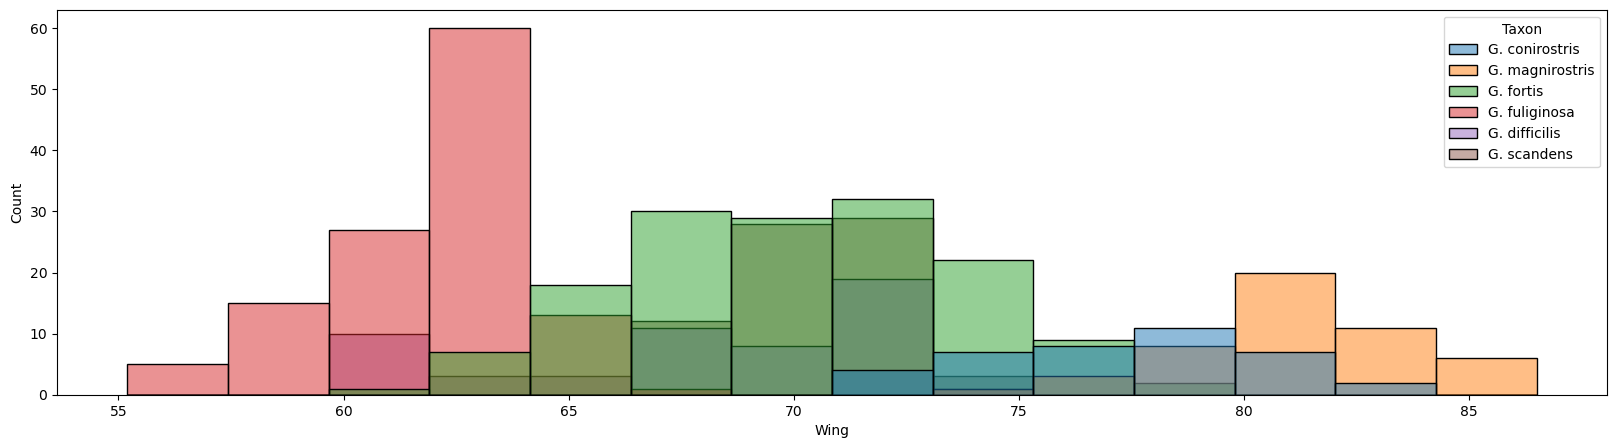

In [241]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="Wing", hue="Taxon")

But only is unsing axes plots, not figure plots.  Matplotlib settings refer to an axes, not the full figure produced by seaborn figure plots

<Figure size 2000x500 with 0 Axes>

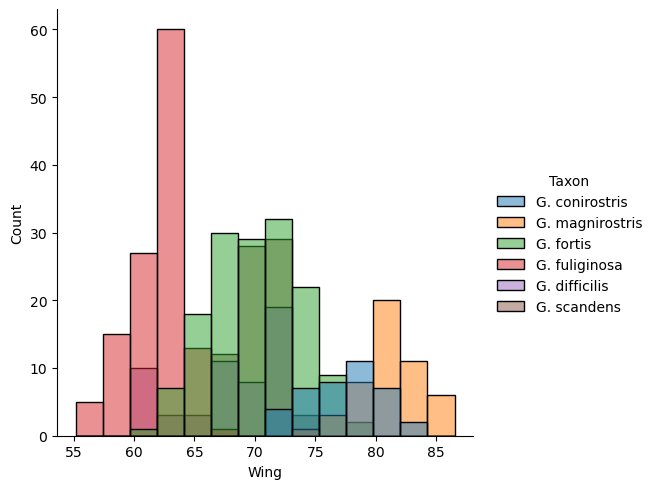

In [242]:
plt.figure(figsize=(20,5))
sns.displot(data=df, x="Wing", hue="Taxon")

To change size on a seaborn figure we use its internal settings height and aspect (the ratio between hieght and width) to control the size of each subplot wihtin  the figure.

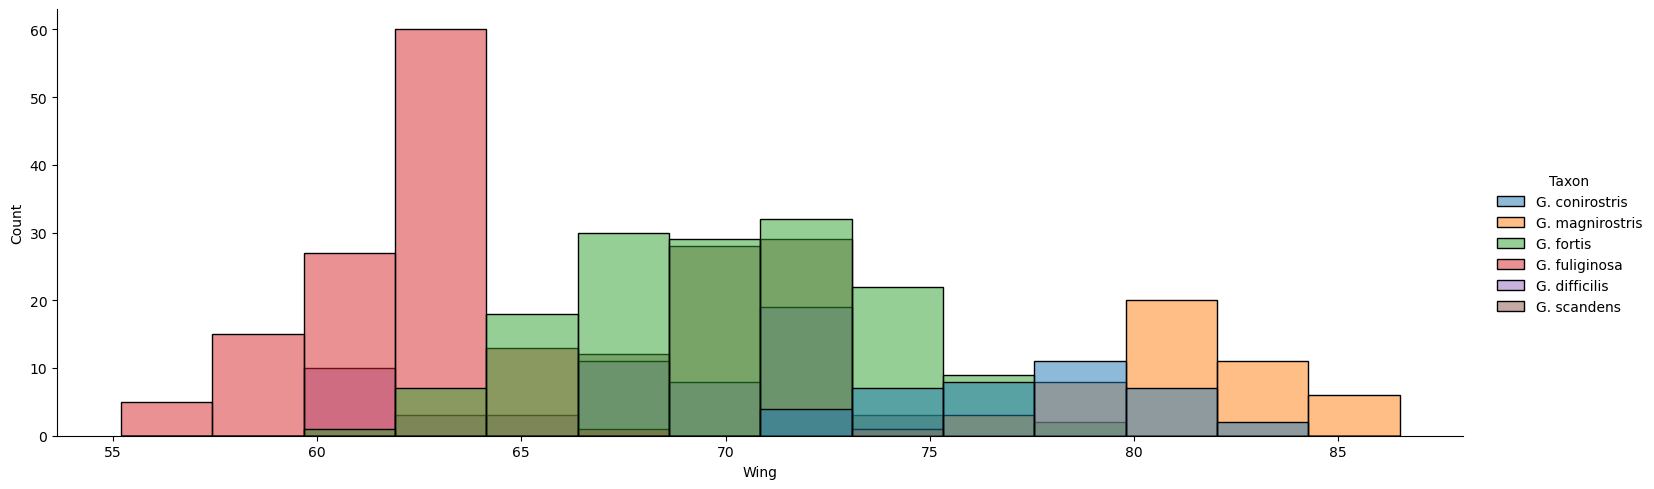

In [243]:
sns.displot(data=df, x="Wing", hue="Taxon", height=5, aspect=3)

Similarily, for changing axes lables ther are differnt appraoches to doing this for axes plots adn Figure (FacetGrids).  https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
    

It would be useful to plot the morphological metrics by one taxonomy and colour by annother.  Try comparing the distribution of wing sizes in each taxonomy using displot or catplot.  

Don't foget that species names ough to be in italics, add this line to your code to rotate and italisicise the species names as x lables:

    plt.xticks(rotation=45, style='italic')

### Making a better plot.  


In [ ]:
Which plot to use?  
How to bring out the patterns in the data?

In [ ]:
How to change size, shape, style?  
Changing lable fonts, orientation, location

In [ ]:
Which colours to use? 
Hue, saturation, colour theory, continous colour gradients

In [ ]:
For some plots it  might be easier to tidy the data and have a single column for morphologicial measurments.  use. 

    pd.melt

### Saving plots for further manipulation

Seaborn can't do everyting.  Sometimes you need to further tweak a plot in another program.  You can export seaborn plot as a .png (big files, transparaency possible), .jpg (smaller files but lossy, no transparency) but the most flexible for futher editing is a vector format like .svg. add the folowing at the end of you code:

    plt.savefig("plot.svg")

Or you might want to make individual files for each plot so you can arrange them how you like.  Here's an example of a python function for generating plots for all the different morphologicial measuresments in a column called "Morphology" with values in "measurement"


In [22]:
#list of the uniques values in the collumn
morph = df3['Morphology'].unique().tolist()

In [21]:
#function to generate boxplots of measuremtns by New_Taxonomy
def plot_me(morph):
    #make the output fie name
    filename = str(morph)+".svg"
    #subset the dataframe to just the chosen morphology
    df_sub = df[(df['Morphology']==morph)]
    #plotting the figure
    plt.figure() 
    chart = sns.catplot(data=df_sub, kind = "box", x="New_Taxonomy", y="measurement")
    chart.set_xticklabels(rotation=65, horizontalalignment='right')
    #saving to file
    plt.savefig(filename)

In [ ]:
#Plotting loop
for i in morph:
    plot_me(i)

You should have in your folder now a set of svg files ready to build into your figure